In [42]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


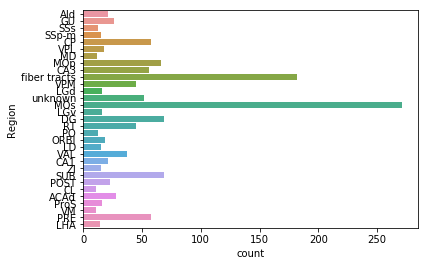

In [46]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

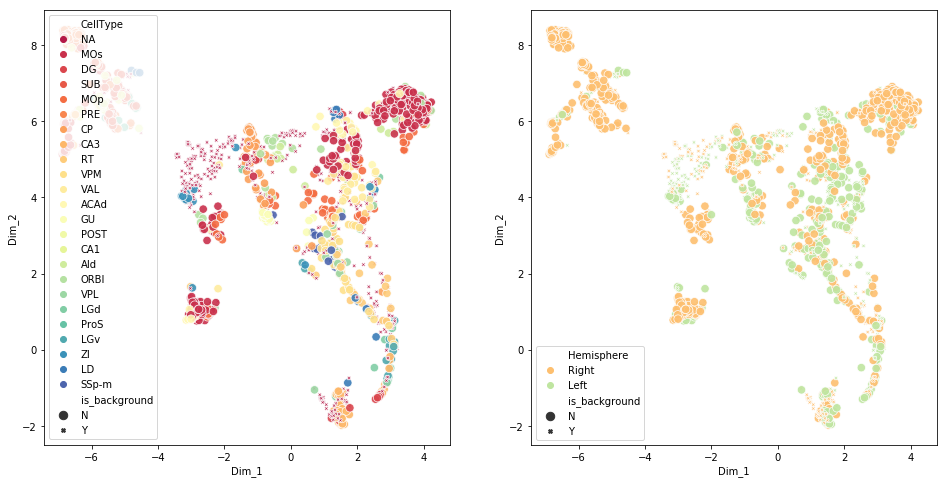

In [47]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

In [51]:
id_to_name(nmt.bs,int(9))

'SSp-tr6a'

In [48]:
def id_to_name(self, region_ID):
        # region_name can be either Abbreviation (checked first) or description
        if region_ID in self.level.index.tolist():
            return self.level.loc[region_ID,'Abbreviation']
        else:
            print("Cannot find any regions with ID %s." % region_ID)

In [ ]:
import multiprocessing
import time
def Contour_Matrix(RegionID, M_reg, M_contour, co_1_in, co_2_in, co_3_in):
    # M_reg is the matrix mask, 1 for point outside the region
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    count_p = 0
    for iter_pixel in range(len(co_1_in)):
        #print(iter_pixel)
        #print((co_1[iter_pixel],co_2[iter_pixel],co_3[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1_in[iter_pixel]-1),co_2_in[iter_pixel],co_3_in[iter_pixel]]=1                 # -1,0,0
        M_mask[min(M_mask.shape[0]-1,co_1_in[iter_pixel]+1),co_2_in[iter_pixel],co_3_in[iter_pixel]]=1 # +1,0,0
        M_mask[co_1_in[iter_pixel],max(0,co_2_in[iter_pixel]-1),co_3_in[iter_pixel]]=1# 0,-1,0
        M_mask[co_1_in[iter_pixel],min(M_mask.shape[1]-1,co_2_in[iter_pixel]+1),co_3_in[iter_pixel]]=1 # 0,+1,0
        M_mask[co_1_in[iter_pixel],co_2_in[iter_pixel],max(0,co_3_in[iter_pixel]-1)]=1# 0,0,-1
        M_mask[co_1_in[iter_pixel],co_2_in[iter_pixel],min(M_mask.shape[2]-1,co_3_in[iter_pixel]+1)]=1 # 0,0,+1
        assert M_mask.shape == nmt.annotation.array.shape
        M_contour[co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]]=np.sum(np.sum(np.multiply(M_reg,M_mask)))>0
        #print((co_1_in[iter_pixel],co_2_in[iter_pixel],co_3_in[iter_pixel]))
        count_p = count_p + int(np.sum(np.sum(np.multiply(M_reg,M_mask)))>0)
        #print('Number of vertices: '+ str(count_p))
        if np.sum(M_contour)%10 == 0:
            print('The contour of region '+ str(id_to_name(nmt.bs,int(RegionID))) + ' has '+ str(np.sum(M_contour)) + ' vertices now')
        #print(type(M_contour))
    return M_contour.copy()

corenum = 24
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (iterReg,M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    #print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

In [ ]:
def id_to_name(self, region_ID):
    # region_name can be either Abbreviation (checked first) or description
    if region_ID in self.level.index.tolist():
        return self.level.loc[region_ID,'Abbrevation']
    else:
        print("Cannot find any regions with ID %s." % region_ID)
    

In [4]:


hier_resultDF = pd.read_excel('/home/penglab/NMTcode/hier_resultDF.xlsx')
kmeans_resultDF = pd.read_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx')
dbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx')
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')
snn_resultDF= pd.read_excel('/home/penglab/NMTcode/snn_resultDF.xlsx')


In [5]:
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')

In [6]:
hdbscan_resultDF

,idx,ClusterINFO,NumCluster,parameter
0,HDBSCAN0,"[('C-1', SomaRegion Hemisphere ...",132,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
1,HDBSCAN1,"[('C-1', SomaRegion Hemisphere ...",114,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
2,HDBSCAN2,"[('C-1', SomaRegion Hemisphere ...",103,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
3,HDBSCAN3,"[('C-1', SomaRegion Hemisphere ...",81,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
4,HDBSCAN4,"[('C-1', SomaRegion Hemisphere ...",77,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
5,HDBSCAN5,"[('C-1', SomaRegion Hemisphere ...",70,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
6,HDBSCAN6,"[('C-1', SomaRegion Hemisphere ...",61,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
7,HDBSCAN7,"[('C-1', SomaRegion Hemisphere ...",60,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
8,HDBSCAN8,"[('C-1', SomaRegion Hemisphere ...",50,"{'min_cluster_size': 5, 'metric': 'euclidean',..."
9,HDBSCAN9,"[('C-1', SomaRegion Hemisphere ...",132,"{'min_cluster_size': 5, 'metric': 'euclidean',..."


### nmt.annotation.array
* column-major (Fortran-style) order
* Shape:  (528, 320, 456)
* Datatype:  uint32 (nmt.annotation.array.dtype)
* Size:  77045760  (nmt.annotation.array.size)
* Num Dimensions:  3  (nmt.annotation.array.ndim)

In [12]:
M_mask = nmt.annotation.array.copy()
M_mask[:,:,:] = 0
M_mask[:,:,:] = 0

In [13]:
np.sum(np.sum(M_mask))

0

In [64]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.arange(9).reshape((3, 3))
np.dot(x1,x2)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

### 6- nearest array

In [99]:
M_mask = nmt.annotation.array.copy()
np.sum(M_mask)

504915776222016

In [40]:
co_1[iter_pixel]+2

2

In [37]:
M_mask[co_1[iter_pixel]-1:co_1[iter_pixel]+2,co_2[iter_pixel]-1:co_2[iter_pixel]+2,co_3[iter_pixel]-1:co_3[iter_pixel]+2] = 1

In [51]:
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,55-1):min(M_mask.shape[0],55+1),
                   max(0,55-1):min(M_mask.shape[1],55+1),
               max(0,55-1):min(M_mask.shape[2],55+1)] = 1
        print(np.sum(np.sum(M_mask)))

8


In [59]:
Regtype

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156, 

### Single line

In [71]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    i_p = i_p+1
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

Loading progess inside region 1 : 0.00000
Loading progess inside region 1 : 0.00014
Loading progess inside region 1 : 0.00029
Loading progess inside region 1 : 0.00043
Loading progess inside region 1 : 0.00058
Loading progess inside region 1 : 0.00072
Loading progess inside region 1 : 0.00087
Loading progess inside region 1 : 0.00101
Loading progess inside region 1 : 0.00115
Loading progess inside region 1 : 0.00130
Loading progess inside region 1 : 0.00144
Loading progess inside region 1 : 0.00159
Loading progess inside region 1 : 0.00173
Loading progess inside region 1 : 0.00188
Loading progess inside region 1 : 0.00202
Loading progess inside region 1 : 0.00216
Loading progess inside region 1 : 0.00231
Loading progess inside region 1 : 0.00245
Loading progess inside region 1 : 0.00260
Loading progess inside region 1 : 0.00274
Loading progess inside region 1 : 0.00289
Loading progess inside region 1 : 0.00303
Loading progess inside region 1 : 0.00317
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.02828
Loading progess inside region 1 : 0.02842
Loading progess inside region 1 : 0.02857
Loading progess inside region 1 : 0.02871
Loading progess inside region 1 : 0.02886
Loading progess inside region 1 : 0.02900
Loading progess inside region 1 : 0.02914
Loading progess inside region 1 : 0.02929
Loading progess inside region 1 : 0.02943
Loading progess inside region 1 : 0.02958
Loading progess inside region 1 : 0.02972
Loading progess inside region 1 : 0.02987
Loading progess inside region 1 : 0.03001
Loading progess inside region 1 : 0.03015
Loading progess inside region 1 : 0.03030
Loading progess inside region 1 : 0.03044
Loading progess inside region 1 : 0.03059
Loading progess inside region 1 : 0.03073
Loading progess inside region 1 : 0.03088
Loading progess inside region 1 : 0.03102
Loading progess inside region 1 : 0.03116
Loading progess inside region 1 : 0.03131
Loading progess inside region 1 : 0.03145
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.05656
Loading progess inside region 1 : 0.05670
Loading progess inside region 1 : 0.05685
Loading progess inside region 1 : 0.05699
Loading progess inside region 1 : 0.05713
Loading progess inside region 1 : 0.05728
Loading progess inside region 1 : 0.05742
Loading progess inside region 1 : 0.05757
Loading progess inside region 1 : 0.05771
Loading progess inside region 1 : 0.05786
Loading progess inside region 1 : 0.05800
Loading progess inside region 1 : 0.05814
Loading progess inside region 1 : 0.05829
Loading progess inside region 1 : 0.05843
Loading progess inside region 1 : 0.05858
Loading progess inside region 1 : 0.05872
Loading progess inside region 1 : 0.05887
Loading progess inside region 1 : 0.05901
Loading progess inside region 1 : 0.05915
Loading progess inside region 1 : 0.05930
Loading progess inside region 1 : 0.05944
Loading progess inside region 1 : 0.05959
Loading progess inside region 1 : 0.05973
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.08484
Loading progess inside region 1 : 0.08498
Loading progess inside region 1 : 0.08512
Loading progess inside region 1 : 0.08527
Loading progess inside region 1 : 0.08541
Loading progess inside region 1 : 0.08556
Loading progess inside region 1 : 0.08570
Loading progess inside region 1 : 0.08585
Loading progess inside region 1 : 0.08599
Loading progess inside region 1 : 0.08613
Loading progess inside region 1 : 0.08628
Loading progess inside region 1 : 0.08642
Loading progess inside region 1 : 0.08657
Loading progess inside region 1 : 0.08671
Loading progess inside region 1 : 0.08686
Loading progess inside region 1 : 0.08700
Loading progess inside region 1 : 0.08714
Loading progess inside region 1 : 0.08729
Loading progess inside region 1 : 0.08743
Loading progess inside region 1 : 0.08758
Loading progess inside region 1 : 0.08772
Loading progess inside region 1 : 0.08787
Loading progess inside region 1 : 0.08801
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.11311
Loading progess inside region 1 : 0.11326
Loading progess inside region 1 : 0.11340
Loading progess inside region 1 : 0.11355
Loading progess inside region 1 : 0.11369
Loading progess inside region 1 : 0.11384
Loading progess inside region 1 : 0.11398
Loading progess inside region 1 : 0.11412
Loading progess inside region 1 : 0.11427
Loading progess inside region 1 : 0.11441
Loading progess inside region 1 : 0.11456
Loading progess inside region 1 : 0.11470
Loading progess inside region 1 : 0.11485
Loading progess inside region 1 : 0.11499
Loading progess inside region 1 : 0.11513
Loading progess inside region 1 : 0.11528
Loading progess inside region 1 : 0.11542
Loading progess inside region 1 : 0.11557
Loading progess inside region 1 : 0.11571
Loading progess inside region 1 : 0.11586
Loading progess inside region 1 : 0.11600
Loading progess inside region 1 : 0.11614
Loading progess inside region 1 : 0.11629
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.14139
Loading progess inside region 1 : 0.14154
Loading progess inside region 1 : 0.14168
Loading progess inside region 1 : 0.14183
Loading progess inside region 1 : 0.14197
Loading progess inside region 1 : 0.14212
Loading progess inside region 1 : 0.14226
Loading progess inside region 1 : 0.14240
Loading progess inside region 1 : 0.14255
Loading progess inside region 1 : 0.14269
Loading progess inside region 1 : 0.14284
Loading progess inside region 1 : 0.14298
Loading progess inside region 1 : 0.14313
Loading progess inside region 1 : 0.14327
Loading progess inside region 1 : 0.14341
Loading progess inside region 1 : 0.14356
Loading progess inside region 1 : 0.14370
Loading progess inside region 1 : 0.14385
Loading progess inside region 1 : 0.14399
Loading progess inside region 1 : 0.14414
Loading progess inside region 1 : 0.14428
Loading progess inside region 1 : 0.14442
Loading progess inside region 1 : 0.14457
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.16967
Loading progess inside region 1 : 0.16982
Loading progess inside region 1 : 0.16996
Loading progess inside region 1 : 0.17011
Loading progess inside region 1 : 0.17025
Loading progess inside region 1 : 0.17039
Loading progess inside region 1 : 0.17054
Loading progess inside region 1 : 0.17068
Loading progess inside region 1 : 0.17083
Loading progess inside region 1 : 0.17097
Loading progess inside region 1 : 0.17112
Loading progess inside region 1 : 0.17126
Loading progess inside region 1 : 0.17140
Loading progess inside region 1 : 0.17155
Loading progess inside region 1 : 0.17169
Loading progess inside region 1 : 0.17184
Loading progess inside region 1 : 0.17198
Loading progess inside region 1 : 0.17213
Loading progess inside region 1 : 0.17227
Loading progess inside region 1 : 0.17241
Loading progess inside region 1 : 0.17256
Loading progess inside region 1 : 0.17270
Loading progess inside region 1 : 0.17285
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.19795
Loading progess inside region 1 : 0.19810
Loading progess inside region 1 : 0.19824
Loading progess inside region 1 : 0.19838
Loading progess inside region 1 : 0.19853
Loading progess inside region 1 : 0.19867
Loading progess inside region 1 : 0.19882
Loading progess inside region 1 : 0.19896
Loading progess inside region 1 : 0.19911
Loading progess inside region 1 : 0.19925
Loading progess inside region 1 : 0.19939
Loading progess inside region 1 : 0.19954
Loading progess inside region 1 : 0.19968
Loading progess inside region 1 : 0.19983
Loading progess inside region 1 : 0.19997
Loading progess inside region 1 : 0.20012
Loading progess inside region 1 : 0.20026
Loading progess inside region 1 : 0.20040
Loading progess inside region 1 : 0.20055
Loading progess inside region 1 : 0.20069
Loading progess inside region 1 : 0.20084
Loading progess inside region 1 : 0.20098
Loading progess inside region 1 : 0.20113
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.22623
Loading progess inside region 1 : 0.22637
Loading progess inside region 1 : 0.22652
Loading progess inside region 1 : 0.22666
Loading progess inside region 1 : 0.22681
Loading progess inside region 1 : 0.22695
Loading progess inside region 1 : 0.22710
Loading progess inside region 1 : 0.22724
Loading progess inside region 1 : 0.22738
Loading progess inside region 1 : 0.22753
Loading progess inside region 1 : 0.22767
Loading progess inside region 1 : 0.22782
Loading progess inside region 1 : 0.22796
Loading progess inside region 1 : 0.22811
Loading progess inside region 1 : 0.22825
Loading progess inside region 1 : 0.22839
Loading progess inside region 1 : 0.22854
Loading progess inside region 1 : 0.22868
Loading progess inside region 1 : 0.22883
Loading progess inside region 1 : 0.22897
Loading progess inside region 1 : 0.22912
Loading progess inside region 1 : 0.22926
Loading progess inside region 1 : 0.22940
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.25451
Loading progess inside region 1 : 0.25465
Loading progess inside region 1 : 0.25480
Loading progess inside region 1 : 0.25494
Loading progess inside region 1 : 0.25509
Loading progess inside region 1 : 0.25523
Loading progess inside region 1 : 0.25537
Loading progess inside region 1 : 0.25552
Loading progess inside region 1 : 0.25566
Loading progess inside region 1 : 0.25581
Loading progess inside region 1 : 0.25595
Loading progess inside region 1 : 0.25610
Loading progess inside region 1 : 0.25624
Loading progess inside region 1 : 0.25638
Loading progess inside region 1 : 0.25653
Loading progess inside region 1 : 0.25667
Loading progess inside region 1 : 0.25682
Loading progess inside region 1 : 0.25696
Loading progess inside region 1 : 0.25711
Loading progess inside region 1 : 0.25725
Loading progess inside region 1 : 0.25739
Loading progess inside region 1 : 0.25754
Loading progess inside region 1 : 0.25768
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.28279
Loading progess inside region 1 : 0.28293
Loading progess inside region 1 : 0.28308
Loading progess inside region 1 : 0.28322
Loading progess inside region 1 : 0.28336
Loading progess inside region 1 : 0.28351
Loading progess inside region 1 : 0.28365
Loading progess inside region 1 : 0.28380
Loading progess inside region 1 : 0.28394
Loading progess inside region 1 : 0.28409
Loading progess inside region 1 : 0.28423
Loading progess inside region 1 : 0.28437
Loading progess inside region 1 : 0.28452
Loading progess inside region 1 : 0.28466
Loading progess inside region 1 : 0.28481
Loading progess inside region 1 : 0.28495
Loading progess inside region 1 : 0.28510
Loading progess inside region 1 : 0.28524
Loading progess inside region 1 : 0.28538
Loading progess inside region 1 : 0.28553
Loading progess inside region 1 : 0.28567
Loading progess inside region 1 : 0.28582
Loading progess inside region 1 : 0.28596
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.31107
Loading progess inside region 1 : 0.31121
Loading progess inside region 1 : 0.31135
Loading progess inside region 1 : 0.31150
Loading progess inside region 1 : 0.31164
Loading progess inside region 1 : 0.31179
Loading progess inside region 1 : 0.31193
Loading progess inside region 1 : 0.31208
Loading progess inside region 1 : 0.31222
Loading progess inside region 1 : 0.31236
Loading progess inside region 1 : 0.31251
Loading progess inside region 1 : 0.31265
Loading progess inside region 1 : 0.31280
Loading progess inside region 1 : 0.31294
Loading progess inside region 1 : 0.31309
Loading progess inside region 1 : 0.31323
Loading progess inside region 1 : 0.31337
Loading progess inside region 1 : 0.31352
Loading progess inside region 1 : 0.31366
Loading progess inside region 1 : 0.31381
Loading progess inside region 1 : 0.31395
Loading progess inside region 1 : 0.31410
Loading progess inside region 1 : 0.31424
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.33934
Loading progess inside region 1 : 0.33949
Loading progess inside region 1 : 0.33963
Loading progess inside region 1 : 0.33978
Loading progess inside region 1 : 0.33992
Loading progess inside region 1 : 0.34007
Loading progess inside region 1 : 0.34021
Loading progess inside region 1 : 0.34035
Loading progess inside region 1 : 0.34050
Loading progess inside region 1 : 0.34064
Loading progess inside region 1 : 0.34079
Loading progess inside region 1 : 0.34093
Loading progess inside region 1 : 0.34108
Loading progess inside region 1 : 0.34122
Loading progess inside region 1 : 0.34136
Loading progess inside region 1 : 0.34151
Loading progess inside region 1 : 0.34165
Loading progess inside region 1 : 0.34180
Loading progess inside region 1 : 0.34194
Loading progess inside region 1 : 0.34209
Loading progess inside region 1 : 0.34223
Loading progess inside region 1 : 0.34237
Loading progess inside region 1 : 0.34252
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.36762
Loading progess inside region 1 : 0.36777
Loading progess inside region 1 : 0.36791
Loading progess inside region 1 : 0.36806
Loading progess inside region 1 : 0.36820
Loading progess inside region 1 : 0.36835
Loading progess inside region 1 : 0.36849
Loading progess inside region 1 : 0.36863
Loading progess inside region 1 : 0.36878
Loading progess inside region 1 : 0.36892
Loading progess inside region 1 : 0.36907
Loading progess inside region 1 : 0.36921
Loading progess inside region 1 : 0.36936
Loading progess inside region 1 : 0.36950
Loading progess inside region 1 : 0.36964
Loading progess inside region 1 : 0.36979
Loading progess inside region 1 : 0.36993
Loading progess inside region 1 : 0.37008
Loading progess inside region 1 : 0.37022
Loading progess inside region 1 : 0.37037
Loading progess inside region 1 : 0.37051
Loading progess inside region 1 : 0.37065
Loading progess inside region 1 : 0.37080
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.39590
Loading progess inside region 1 : 0.39605
Loading progess inside region 1 : 0.39619
Loading progess inside region 1 : 0.39634
Loading progess inside region 1 : 0.39648
Loading progess inside region 1 : 0.39662
Loading progess inside region 1 : 0.39677
Loading progess inside region 1 : 0.39691
Loading progess inside region 1 : 0.39706
Loading progess inside region 1 : 0.39720
Loading progess inside region 1 : 0.39735
Loading progess inside region 1 : 0.39749
Loading progess inside region 1 : 0.39763
Loading progess inside region 1 : 0.39778
Loading progess inside region 1 : 0.39792
Loading progess inside region 1 : 0.39807
Loading progess inside region 1 : 0.39821
Loading progess inside region 1 : 0.39836
Loading progess inside region 1 : 0.39850
Loading progess inside region 1 : 0.39864
Loading progess inside region 1 : 0.39879
Loading progess inside region 1 : 0.39893
Loading progess inside region 1 : 0.39908
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.42418
Loading progess inside region 1 : 0.42433
Loading progess inside region 1 : 0.42447
Loading progess inside region 1 : 0.42461
Loading progess inside region 1 : 0.42476
Loading progess inside region 1 : 0.42490
Loading progess inside region 1 : 0.42505
Loading progess inside region 1 : 0.42519
Loading progess inside region 1 : 0.42534
Loading progess inside region 1 : 0.42548
Loading progess inside region 1 : 0.42562
Loading progess inside region 1 : 0.42577
Loading progess inside region 1 : 0.42591
Loading progess inside region 1 : 0.42606
Loading progess inside region 1 : 0.42620
Loading progess inside region 1 : 0.42635
Loading progess inside region 1 : 0.42649
Loading progess inside region 1 : 0.42663
Loading progess inside region 1 : 0.42678
Loading progess inside region 1 : 0.42692
Loading progess inside region 1 : 0.42707
Loading progess inside region 1 : 0.42721
Loading progess inside region 1 : 0.42736
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.45246
Loading progess inside region 1 : 0.45260
Loading progess inside region 1 : 0.45275
Loading progess inside region 1 : 0.45289
Loading progess inside region 1 : 0.45304
Loading progess inside region 1 : 0.45318
Loading progess inside region 1 : 0.45333
Loading progess inside region 1 : 0.45347
Loading progess inside region 1 : 0.45361
Loading progess inside region 1 : 0.45376
Loading progess inside region 1 : 0.45390
Loading progess inside region 1 : 0.45405
Loading progess inside region 1 : 0.45419
Loading progess inside region 1 : 0.45434
Loading progess inside region 1 : 0.45448
Loading progess inside region 1 : 0.45462
Loading progess inside region 1 : 0.45477
Loading progess inside region 1 : 0.45491
Loading progess inside region 1 : 0.45506
Loading progess inside region 1 : 0.45520
Loading progess inside region 1 : 0.45535
Loading progess inside region 1 : 0.45549
Loading progess inside region 1 : 0.45563
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.48074
Loading progess inside region 1 : 0.48088
Loading progess inside region 1 : 0.48103
Loading progess inside region 1 : 0.48117
Loading progess inside region 1 : 0.48132
Loading progess inside region 1 : 0.48146
Loading progess inside region 1 : 0.48160
Loading progess inside region 1 : 0.48175
Loading progess inside region 1 : 0.48189
Loading progess inside region 1 : 0.48204
Loading progess inside region 1 : 0.48218
Loading progess inside region 1 : 0.48233
Loading progess inside region 1 : 0.48247
Loading progess inside region 1 : 0.48261
Loading progess inside region 1 : 0.48276
Loading progess inside region 1 : 0.48290
Loading progess inside region 1 : 0.48305
Loading progess inside region 1 : 0.48319
Loading progess inside region 1 : 0.48334
Loading progess inside region 1 : 0.48348
Loading progess inside region 1 : 0.48362
Loading progess inside region 1 : 0.48377
Loading progess inside region 1 : 0.48391
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.50902
Loading progess inside region 1 : 0.50916
Loading progess inside region 1 : 0.50931
Loading progess inside region 1 : 0.50945
Loading progess inside region 1 : 0.50959
Loading progess inside region 1 : 0.50974
Loading progess inside region 1 : 0.50988
Loading progess inside region 1 : 0.51003
Loading progess inside region 1 : 0.51017
Loading progess inside region 1 : 0.51032
Loading progess inside region 1 : 0.51046
Loading progess inside region 1 : 0.51060
Loading progess inside region 1 : 0.51075
Loading progess inside region 1 : 0.51089
Loading progess inside region 1 : 0.51104
Loading progess inside region 1 : 0.51118
Loading progess inside region 1 : 0.51133
Loading progess inside region 1 : 0.51147
Loading progess inside region 1 : 0.51161
Loading progess inside region 1 : 0.51176
Loading progess inside region 1 : 0.51190
Loading progess inside region 1 : 0.51205
Loading progess inside region 1 : 0.51219
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.53730
Loading progess inside region 1 : 0.53744
Loading progess inside region 1 : 0.53758
Loading progess inside region 1 : 0.53773
Loading progess inside region 1 : 0.53787
Loading progess inside region 1 : 0.53802
Loading progess inside region 1 : 0.53816
Loading progess inside region 1 : 0.53831
Loading progess inside region 1 : 0.53845
Loading progess inside region 1 : 0.53859
Loading progess inside region 1 : 0.53874
Loading progess inside region 1 : 0.53888
Loading progess inside region 1 : 0.53903
Loading progess inside region 1 : 0.53917
Loading progess inside region 1 : 0.53932
Loading progess inside region 1 : 0.53946
Loading progess inside region 1 : 0.53960
Loading progess inside region 1 : 0.53975
Loading progess inside region 1 : 0.53989
Loading progess inside region 1 : 0.54004
Loading progess inside region 1 : 0.54018
Loading progess inside region 1 : 0.54033
Loading progess inside region 1 : 0.54047
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.56557
Loading progess inside region 1 : 0.56572
Loading progess inside region 1 : 0.56586
Loading progess inside region 1 : 0.56601
Loading progess inside region 1 : 0.56615
Loading progess inside region 1 : 0.56630
Loading progess inside region 1 : 0.56644
Loading progess inside region 1 : 0.56658
Loading progess inside region 1 : 0.56673
Loading progess inside region 1 : 0.56687
Loading progess inside region 1 : 0.56702
Loading progess inside region 1 : 0.56716
Loading progess inside region 1 : 0.56731
Loading progess inside region 1 : 0.56745
Loading progess inside region 1 : 0.56759
Loading progess inside region 1 : 0.56774
Loading progess inside region 1 : 0.56788
Loading progess inside region 1 : 0.56803
Loading progess inside region 1 : 0.56817
Loading progess inside region 1 : 0.56832
Loading progess inside region 1 : 0.56846
Loading progess inside region 1 : 0.56860
Loading progess inside region 1 : 0.56875
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.59385
Loading progess inside region 1 : 0.59400
Loading progess inside region 1 : 0.59414
Loading progess inside region 1 : 0.59429
Loading progess inside region 1 : 0.59443
Loading progess inside region 1 : 0.59458
Loading progess inside region 1 : 0.59472
Loading progess inside region 1 : 0.59486
Loading progess inside region 1 : 0.59501
Loading progess inside region 1 : 0.59515
Loading progess inside region 1 : 0.59530
Loading progess inside region 1 : 0.59544
Loading progess inside region 1 : 0.59559
Loading progess inside region 1 : 0.59573
Loading progess inside region 1 : 0.59587
Loading progess inside region 1 : 0.59602
Loading progess inside region 1 : 0.59616
Loading progess inside region 1 : 0.59631
Loading progess inside region 1 : 0.59645
Loading progess inside region 1 : 0.59660
Loading progess inside region 1 : 0.59674
Loading progess inside region 1 : 0.59688
Loading progess inside region 1 : 0.59703
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.62213
Loading progess inside region 1 : 0.62228
Loading progess inside region 1 : 0.62242
Loading progess inside region 1 : 0.62257
Loading progess inside region 1 : 0.62271
Loading progess inside region 1 : 0.62285
Loading progess inside region 1 : 0.62300
Loading progess inside region 1 : 0.62314
Loading progess inside region 1 : 0.62329
Loading progess inside region 1 : 0.62343
Loading progess inside region 1 : 0.62358
Loading progess inside region 1 : 0.62372
Loading progess inside region 1 : 0.62386
Loading progess inside region 1 : 0.62401
Loading progess inside region 1 : 0.62415
Loading progess inside region 1 : 0.62430
Loading progess inside region 1 : 0.62444
Loading progess inside region 1 : 0.62459
Loading progess inside region 1 : 0.62473
Loading progess inside region 1 : 0.62487
Loading progess inside region 1 : 0.62502
Loading progess inside region 1 : 0.62516
Loading progess inside region 1 : 0.62531
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.65041
Loading progess inside region 1 : 0.65056
Loading progess inside region 1 : 0.65070
Loading progess inside region 1 : 0.65084
Loading progess inside region 1 : 0.65099
Loading progess inside region 1 : 0.65113
Loading progess inside region 1 : 0.65128
Loading progess inside region 1 : 0.65142
Loading progess inside region 1 : 0.65157
Loading progess inside region 1 : 0.65171
Loading progess inside region 1 : 0.65185
Loading progess inside region 1 : 0.65200
Loading progess inside region 1 : 0.65214
Loading progess inside region 1 : 0.65229
Loading progess inside region 1 : 0.65243
Loading progess inside region 1 : 0.65258
Loading progess inside region 1 : 0.65272
Loading progess inside region 1 : 0.65286
Loading progess inside region 1 : 0.65301
Loading progess inside region 1 : 0.65315
Loading progess inside region 1 : 0.65330
Loading progess inside region 1 : 0.65344
Loading progess inside region 1 : 0.65359
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.67869
Loading progess inside region 1 : 0.67883
Loading progess inside region 1 : 0.67898
Loading progess inside region 1 : 0.67912
Loading progess inside region 1 : 0.67927
Loading progess inside region 1 : 0.67941
Loading progess inside region 1 : 0.67956
Loading progess inside region 1 : 0.67970
Loading progess inside region 1 : 0.67984
Loading progess inside region 1 : 0.67999
Loading progess inside region 1 : 0.68013
Loading progess inside region 1 : 0.68028
Loading progess inside region 1 : 0.68042
Loading progess inside region 1 : 0.68057
Loading progess inside region 1 : 0.68071
Loading progess inside region 1 : 0.68085
Loading progess inside region 1 : 0.68100
Loading progess inside region 1 : 0.68114
Loading progess inside region 1 : 0.68129
Loading progess inside region 1 : 0.68143
Loading progess inside region 1 : 0.68158
Loading progess inside region 1 : 0.68172
Loading progess inside region 1 : 0.68186
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.70697
Loading progess inside region 1 : 0.70711
Loading progess inside region 1 : 0.70726
Loading progess inside region 1 : 0.70740
Loading progess inside region 1 : 0.70755
Loading progess inside region 1 : 0.70769
Loading progess inside region 1 : 0.70783
Loading progess inside region 1 : 0.70798
Loading progess inside region 1 : 0.70812
Loading progess inside region 1 : 0.70827
Loading progess inside region 1 : 0.70841
Loading progess inside region 1 : 0.70856
Loading progess inside region 1 : 0.70870
Loading progess inside region 1 : 0.70884
Loading progess inside region 1 : 0.70899
Loading progess inside region 1 : 0.70913
Loading progess inside region 1 : 0.70928
Loading progess inside region 1 : 0.70942
Loading progess inside region 1 : 0.70957
Loading progess inside region 1 : 0.70971
Loading progess inside region 1 : 0.70985
Loading progess inside region 1 : 0.71000
Loading progess inside region 1 : 0.71014
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.73525
Loading progess inside region 1 : 0.73539
Loading progess inside region 1 : 0.73554
Loading progess inside region 1 : 0.73568
Loading progess inside region 1 : 0.73582
Loading progess inside region 1 : 0.73597
Loading progess inside region 1 : 0.73611
Loading progess inside region 1 : 0.73626
Loading progess inside region 1 : 0.73640
Loading progess inside region 1 : 0.73655
Loading progess inside region 1 : 0.73669
Loading progess inside region 1 : 0.73683
Loading progess inside region 1 : 0.73698
Loading progess inside region 1 : 0.73712
Loading progess inside region 1 : 0.73727
Loading progess inside region 1 : 0.73741
Loading progess inside region 1 : 0.73756
Loading progess inside region 1 : 0.73770
Loading progess inside region 1 : 0.73784
Loading progess inside region 1 : 0.73799
Loading progess inside region 1 : 0.73813
Loading progess inside region 1 : 0.73828
Loading progess inside region 1 : 0.73842
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.76353
Loading progess inside region 1 : 0.76367
Loading progess inside region 1 : 0.76381
Loading progess inside region 1 : 0.76396
Loading progess inside region 1 : 0.76410
Loading progess inside region 1 : 0.76425
Loading progess inside region 1 : 0.76439
Loading progess inside region 1 : 0.76454
Loading progess inside region 1 : 0.76468
Loading progess inside region 1 : 0.76482
Loading progess inside region 1 : 0.76497
Loading progess inside region 1 : 0.76511
Loading progess inside region 1 : 0.76526
Loading progess inside region 1 : 0.76540
Loading progess inside region 1 : 0.76555
Loading progess inside region 1 : 0.76569
Loading progess inside region 1 : 0.76583
Loading progess inside region 1 : 0.76598
Loading progess inside region 1 : 0.76612
Loading progess inside region 1 : 0.76627
Loading progess inside region 1 : 0.76641
Loading progess inside region 1 : 0.76656
Loading progess inside region 1 : 0.76670
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.79180
Loading progess inside region 1 : 0.79195
Loading progess inside region 1 : 0.79209
Loading progess inside region 1 : 0.79224
Loading progess inside region 1 : 0.79238
Loading progess inside region 1 : 0.79253
Loading progess inside region 1 : 0.79267
Loading progess inside region 1 : 0.79281
Loading progess inside region 1 : 0.79296
Loading progess inside region 1 : 0.79310
Loading progess inside region 1 : 0.79325
Loading progess inside region 1 : 0.79339
Loading progess inside region 1 : 0.79354
Loading progess inside region 1 : 0.79368
Loading progess inside region 1 : 0.79382
Loading progess inside region 1 : 0.79397
Loading progess inside region 1 : 0.79411
Loading progess inside region 1 : 0.79426
Loading progess inside region 1 : 0.79440
Loading progess inside region 1 : 0.79455
Loading progess inside region 1 : 0.79469
Loading progess inside region 1 : 0.79483
Loading progess inside region 1 : 0.79498
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.82008
Loading progess inside region 1 : 0.82023
Loading progess inside region 1 : 0.82037
Loading progess inside region 1 : 0.82052
Loading progess inside region 1 : 0.82066
Loading progess inside region 1 : 0.82081
Loading progess inside region 1 : 0.82095
Loading progess inside region 1 : 0.82109
Loading progess inside region 1 : 0.82124
Loading progess inside region 1 : 0.82138
Loading progess inside region 1 : 0.82153
Loading progess inside region 1 : 0.82167
Loading progess inside region 1 : 0.82182
Loading progess inside region 1 : 0.82196
Loading progess inside region 1 : 0.82210
Loading progess inside region 1 : 0.82225
Loading progess inside region 1 : 0.82239
Loading progess inside region 1 : 0.82254
Loading progess inside region 1 : 0.82268
Loading progess inside region 1 : 0.82282
Loading progess inside region 1 : 0.82297
Loading progess inside region 1 : 0.82311
Loading progess inside region 1 : 0.82326
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.84836
Loading progess inside region 1 : 0.84851
Loading progess inside region 1 : 0.84865
Loading progess inside region 1 : 0.84880
Loading progess inside region 1 : 0.84894
Loading progess inside region 1 : 0.84908
Loading progess inside region 1 : 0.84923
Loading progess inside region 1 : 0.84937
Loading progess inside region 1 : 0.84952
Loading progess inside region 1 : 0.84966
Loading progess inside region 1 : 0.84981
Loading progess inside region 1 : 0.84995
Loading progess inside region 1 : 0.85009
Loading progess inside region 1 : 0.85024
Loading progess inside region 1 : 0.85038
Loading progess inside region 1 : 0.85053
Loading progess inside region 1 : 0.85067
Loading progess inside region 1 : 0.85082
Loading progess inside region 1 : 0.85096
Loading progess inside region 1 : 0.85110
Loading progess inside region 1 : 0.85125
Loading progess inside region 1 : 0.85139
Loading progess inside region 1 : 0.85154
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.87664
Loading progess inside region 1 : 0.87679
Loading progess inside region 1 : 0.87693
Loading progess inside region 1 : 0.87707
Loading progess inside region 1 : 0.87722
Loading progess inside region 1 : 0.87736
Loading progess inside region 1 : 0.87751
Loading progess inside region 1 : 0.87765
Loading progess inside region 1 : 0.87780
Loading progess inside region 1 : 0.87794
Loading progess inside region 1 : 0.87808
Loading progess inside region 1 : 0.87823
Loading progess inside region 1 : 0.87837
Loading progess inside region 1 : 0.87852
Loading progess inside region 1 : 0.87866
Loading progess inside region 1 : 0.87881
Loading progess inside region 1 : 0.87895
Loading progess inside region 1 : 0.87909
Loading progess inside region 1 : 0.87924
Loading progess inside region 1 : 0.87938
Loading progess inside region 1 : 0.87953
Loading progess inside region 1 : 0.87967
Loading progess inside region 1 : 0.87982
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.90492
Loading progess inside region 1 : 0.90506
Loading progess inside region 1 : 0.90521
Loading progess inside region 1 : 0.90535
Loading progess inside region 1 : 0.90550
Loading progess inside region 1 : 0.90564
Loading progess inside region 1 : 0.90579
Loading progess inside region 1 : 0.90593
Loading progess inside region 1 : 0.90607
Loading progess inside region 1 : 0.90622
Loading progess inside region 1 : 0.90636
Loading progess inside region 1 : 0.90651
Loading progess inside region 1 : 0.90665
Loading progess inside region 1 : 0.90680
Loading progess inside region 1 : 0.90694
Loading progess inside region 1 : 0.90708
Loading progess inside region 1 : 0.90723
Loading progess inside region 1 : 0.90737
Loading progess inside region 1 : 0.90752
Loading progess inside region 1 : 0.90766
Loading progess inside region 1 : 0.90781
Loading progess inside region 1 : 0.90795
Loading progess inside region 1 : 0.90809
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.93320
Loading progess inside region 1 : 0.93334
Loading progess inside region 1 : 0.93349
Loading progess inside region 1 : 0.93363
Loading progess inside region 1 : 0.93378
Loading progess inside region 1 : 0.93392
Loading progess inside region 1 : 0.93406
Loading progess inside region 1 : 0.93421
Loading progess inside region 1 : 0.93435
Loading progess inside region 1 : 0.93450
Loading progess inside region 1 : 0.93464
Loading progess inside region 1 : 0.93479
Loading progess inside region 1 : 0.93493
Loading progess inside region 1 : 0.93507
Loading progess inside region 1 : 0.93522
Loading progess inside region 1 : 0.93536
Loading progess inside region 1 : 0.93551
Loading progess inside region 1 : 0.93565
Loading progess inside region 1 : 0.93580
Loading progess inside region 1 : 0.93594
Loading progess inside region 1 : 0.93608
Loading progess inside region 1 : 0.93623
Loading progess inside region 1 : 0.93637
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.96148
Loading progess inside region 1 : 0.96162
Loading progess inside region 1 : 0.96177
Loading progess inside region 1 : 0.96191
Loading progess inside region 1 : 0.96205
Loading progess inside region 1 : 0.96220
Loading progess inside region 1 : 0.96234
Loading progess inside region 1 : 0.96249
Loading progess inside region 1 : 0.96263
Loading progess inside region 1 : 0.96278
Loading progess inside region 1 : 0.96292
Loading progess inside region 1 : 0.96306
Loading progess inside region 1 : 0.96321
Loading progess inside region 1 : 0.96335
Loading progess inside region 1 : 0.96350
Loading progess inside region 1 : 0.96364
Loading progess inside region 1 : 0.96379
Loading progess inside region 1 : 0.96393
Loading progess inside region 1 : 0.96407
Loading progess inside region 1 : 0.96422
Loading progess inside region 1 : 0.96436
Loading progess inside region 1 : 0.96451
Loading progess inside region 1 : 0.96465
Loading progess inside region 1 : 

Loading progess inside region 1 : 0.98976
Loading progess inside region 1 : 0.98990
Loading progess inside region 1 : 0.99004
Loading progess inside region 1 : 0.99019
Loading progess inside region 1 : 0.99033
Loading progess inside region 1 : 0.99048
Loading progess inside region 1 : 0.99062
Loading progess inside region 1 : 0.99077
Loading progess inside region 1 : 0.99091
Loading progess inside region 1 : 0.99105
Loading progess inside region 1 : 0.99120
Loading progess inside region 1 : 0.99134
Loading progess inside region 1 : 0.99149
Loading progess inside region 1 : 0.99163
Loading progess inside region 1 : 0.99178
Loading progess inside region 1 : 0.99192
Loading progess inside region 1 : 0.99206
Loading progess inside region 1 : 0.99221
Loading progess inside region 1 : 0.99235
Loading progess inside region 1 : 0.99250
Loading progess inside region 1 : 0.99264
Loading progess inside region 1 : 0.99279
Loading progess inside region 1 : 0.99293
Loading progess inside region 1 : 

Loading progess inside region 2 : 0.01690
Loading progess inside region 2 : 0.01703
Loading progess inside region 2 : 0.01717
Loading progess inside region 2 : 0.01730
Loading progess inside region 2 : 0.01744
Loading progess inside region 2 : 0.01758
Loading progess inside region 2 : 0.01771
Loading progess inside region 2 : 0.01785
Loading progess inside region 2 : 0.01799
Loading progess inside region 2 : 0.01812
Loading progess inside region 2 : 0.01826
Loading progess inside region 2 : 0.01839
Loading progess inside region 2 : 0.01853
Loading progess inside region 2 : 0.01867
Loading progess inside region 2 : 0.01880
Loading progess inside region 2 : 0.01894
Loading progess inside region 2 : 0.01908
Loading progess inside region 2 : 0.01921
Loading progess inside region 2 : 0.01935
Loading progess inside region 2 : 0.01948
Loading progess inside region 2 : 0.01962
Loading progess inside region 2 : 0.01976
Loading progess inside region 2 : 0.01989
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.04360
Loading progess inside region 2 : 0.04374
Loading progess inside region 2 : 0.04388
Loading progess inside region 2 : 0.04401
Loading progess inside region 2 : 0.04415
Loading progess inside region 2 : 0.04428
Loading progess inside region 2 : 0.04442
Loading progess inside region 2 : 0.04456
Loading progess inside region 2 : 0.04469
Loading progess inside region 2 : 0.04483
Loading progess inside region 2 : 0.04497
Loading progess inside region 2 : 0.04510
Loading progess inside region 2 : 0.04524
Loading progess inside region 2 : 0.04537
Loading progess inside region 2 : 0.04551
Loading progess inside region 2 : 0.04565
Loading progess inside region 2 : 0.04578
Loading progess inside region 2 : 0.04592
Loading progess inside region 2 : 0.04606
Loading progess inside region 2 : 0.04619
Loading progess inside region 2 : 0.04633
Loading progess inside region 2 : 0.04646
Loading progess inside region 2 : 0.04660
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.07031
Loading progess inside region 2 : 0.07045
Loading progess inside region 2 : 0.07058
Loading progess inside region 2 : 0.07072
Loading progess inside region 2 : 0.07085
Loading progess inside region 2 : 0.07099
Loading progess inside region 2 : 0.07113
Loading progess inside region 2 : 0.07126
Loading progess inside region 2 : 0.07140
Loading progess inside region 2 : 0.07154
Loading progess inside region 2 : 0.07167
Loading progess inside region 2 : 0.07181
Loading progess inside region 2 : 0.07194
Loading progess inside region 2 : 0.07208
Loading progess inside region 2 : 0.07222
Loading progess inside region 2 : 0.07235
Loading progess inside region 2 : 0.07249
Loading progess inside region 2 : 0.07263
Loading progess inside region 2 : 0.07276
Loading progess inside region 2 : 0.07290
Loading progess inside region 2 : 0.07303
Loading progess inside region 2 : 0.07317
Loading progess inside region 2 : 0.07331
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.09702
Loading progess inside region 2 : 0.09715
Loading progess inside region 2 : 0.09729
Loading progess inside region 2 : 0.09742
Loading progess inside region 2 : 0.09756
Loading progess inside region 2 : 0.09770
Loading progess inside region 2 : 0.09783
Loading progess inside region 2 : 0.09797
Loading progess inside region 2 : 0.09811
Loading progess inside region 2 : 0.09824
Loading progess inside region 2 : 0.09838
Loading progess inside region 2 : 0.09851
Loading progess inside region 2 : 0.09865
Loading progess inside region 2 : 0.09879
Loading progess inside region 2 : 0.09892
Loading progess inside region 2 : 0.09906
Loading progess inside region 2 : 0.09920
Loading progess inside region 2 : 0.09933
Loading progess inside region 2 : 0.09947
Loading progess inside region 2 : 0.09960
Loading progess inside region 2 : 0.09974
Loading progess inside region 2 : 0.09988
Loading progess inside region 2 : 0.10001
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.12372
Loading progess inside region 2 : 0.12386
Loading progess inside region 2 : 0.12400
Loading progess inside region 2 : 0.12413
Loading progess inside region 2 : 0.12427
Loading progess inside region 2 : 0.12440
Loading progess inside region 2 : 0.12454
Loading progess inside region 2 : 0.12468
Loading progess inside region 2 : 0.12481
Loading progess inside region 2 : 0.12495
Loading progess inside region 2 : 0.12509
Loading progess inside region 2 : 0.12522
Loading progess inside region 2 : 0.12536
Loading progess inside region 2 : 0.12549
Loading progess inside region 2 : 0.12563
Loading progess inside region 2 : 0.12577
Loading progess inside region 2 : 0.12590
Loading progess inside region 2 : 0.12604
Loading progess inside region 2 : 0.12618
Loading progess inside region 2 : 0.12631
Loading progess inside region 2 : 0.12645
Loading progess inside region 2 : 0.12658
Loading progess inside region 2 : 0.12672
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.15043
Loading progess inside region 2 : 0.15057
Loading progess inside region 2 : 0.15070
Loading progess inside region 2 : 0.15084
Loading progess inside region 2 : 0.15097
Loading progess inside region 2 : 0.15111
Loading progess inside region 2 : 0.15125
Loading progess inside region 2 : 0.15138
Loading progess inside region 2 : 0.15152
Loading progess inside region 2 : 0.15166
Loading progess inside region 2 : 0.15179
Loading progess inside region 2 : 0.15193
Loading progess inside region 2 : 0.15206
Loading progess inside region 2 : 0.15220
Loading progess inside region 2 : 0.15234
Loading progess inside region 2 : 0.15247
Loading progess inside region 2 : 0.15261
Loading progess inside region 2 : 0.15275
Loading progess inside region 2 : 0.15288
Loading progess inside region 2 : 0.15302
Loading progess inside region 2 : 0.15315
Loading progess inside region 2 : 0.15329
Loading progess inside region 2 : 0.15343
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.17714
Loading progess inside region 2 : 0.17727
Loading progess inside region 2 : 0.17741
Loading progess inside region 2 : 0.17754
Loading progess inside region 2 : 0.17768
Loading progess inside region 2 : 0.17782
Loading progess inside region 2 : 0.17795
Loading progess inside region 2 : 0.17809
Loading progess inside region 2 : 0.17823
Loading progess inside region 2 : 0.17836
Loading progess inside region 2 : 0.17850
Loading progess inside region 2 : 0.17863
Loading progess inside region 2 : 0.17877
Loading progess inside region 2 : 0.17891
Loading progess inside region 2 : 0.17904
Loading progess inside region 2 : 0.17918
Loading progess inside region 2 : 0.17932
Loading progess inside region 2 : 0.17945
Loading progess inside region 2 : 0.17959
Loading progess inside region 2 : 0.17972
Loading progess inside region 2 : 0.17986
Loading progess inside region 2 : 0.18000
Loading progess inside region 2 : 0.18013
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.20384
Loading progess inside region 2 : 0.20398
Loading progess inside region 2 : 0.20412
Loading progess inside region 2 : 0.20425
Loading progess inside region 2 : 0.20439
Loading progess inside region 2 : 0.20452
Loading progess inside region 2 : 0.20466
Loading progess inside region 2 : 0.20480
Loading progess inside region 2 : 0.20493
Loading progess inside region 2 : 0.20507
Loading progess inside region 2 : 0.20521
Loading progess inside region 2 : 0.20534
Loading progess inside region 2 : 0.20548
Loading progess inside region 2 : 0.20561
Loading progess inside region 2 : 0.20575
Loading progess inside region 2 : 0.20589
Loading progess inside region 2 : 0.20602
Loading progess inside region 2 : 0.20616
Loading progess inside region 2 : 0.20630
Loading progess inside region 2 : 0.20643
Loading progess inside region 2 : 0.20657
Loading progess inside region 2 : 0.20670
Loading progess inside region 2 : 0.20684
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.23055
Loading progess inside region 2 : 0.23069
Loading progess inside region 2 : 0.23082
Loading progess inside region 2 : 0.23096
Loading progess inside region 2 : 0.23109
Loading progess inside region 2 : 0.23123
Loading progess inside region 2 : 0.23137
Loading progess inside region 2 : 0.23150
Loading progess inside region 2 : 0.23164
Loading progess inside region 2 : 0.23178
Loading progess inside region 2 : 0.23191
Loading progess inside region 2 : 0.23205
Loading progess inside region 2 : 0.23218
Loading progess inside region 2 : 0.23232
Loading progess inside region 2 : 0.23246
Loading progess inside region 2 : 0.23259
Loading progess inside region 2 : 0.23273
Loading progess inside region 2 : 0.23287
Loading progess inside region 2 : 0.23300
Loading progess inside region 2 : 0.23314
Loading progess inside region 2 : 0.23327
Loading progess inside region 2 : 0.23341
Loading progess inside region 2 : 0.23355
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.25726
Loading progess inside region 2 : 0.25739
Loading progess inside region 2 : 0.25753
Loading progess inside region 2 : 0.25766
Loading progess inside region 2 : 0.25780
Loading progess inside region 2 : 0.25794
Loading progess inside region 2 : 0.25807
Loading progess inside region 2 : 0.25821
Loading progess inside region 2 : 0.25835
Loading progess inside region 2 : 0.25848
Loading progess inside region 2 : 0.25862
Loading progess inside region 2 : 0.25875
Loading progess inside region 2 : 0.25889
Loading progess inside region 2 : 0.25903
Loading progess inside region 2 : 0.25916
Loading progess inside region 2 : 0.25930
Loading progess inside region 2 : 0.25944
Loading progess inside region 2 : 0.25957
Loading progess inside region 2 : 0.25971
Loading progess inside region 2 : 0.25984
Loading progess inside region 2 : 0.25998
Loading progess inside region 2 : 0.26012
Loading progess inside region 2 : 0.26025
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.28396
Loading progess inside region 2 : 0.28410
Loading progess inside region 2 : 0.28423
Loading progess inside region 2 : 0.28437
Loading progess inside region 2 : 0.28451
Loading progess inside region 2 : 0.28464
Loading progess inside region 2 : 0.28478
Loading progess inside region 2 : 0.28492
Loading progess inside region 2 : 0.28505
Loading progess inside region 2 : 0.28519
Loading progess inside region 2 : 0.28532
Loading progess inside region 2 : 0.28546
Loading progess inside region 2 : 0.28560
Loading progess inside region 2 : 0.28573
Loading progess inside region 2 : 0.28587
Loading progess inside region 2 : 0.28601
Loading progess inside region 2 : 0.28614
Loading progess inside region 2 : 0.28628
Loading progess inside region 2 : 0.28642
Loading progess inside region 2 : 0.28655
Loading progess inside region 2 : 0.28669
Loading progess inside region 2 : 0.28682
Loading progess inside region 2 : 0.28696
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.31067
Loading progess inside region 2 : 0.31081
Loading progess inside region 2 : 0.31094
Loading progess inside region 2 : 0.31108
Loading progess inside region 2 : 0.31121
Loading progess inside region 2 : 0.31135
Loading progess inside region 2 : 0.31149
Loading progess inside region 2 : 0.31162
Loading progess inside region 2 : 0.31176
Loading progess inside region 2 : 0.31190
Loading progess inside region 2 : 0.31203
Loading progess inside region 2 : 0.31217
Loading progess inside region 2 : 0.31230
Loading progess inside region 2 : 0.31244
Loading progess inside region 2 : 0.31258
Loading progess inside region 2 : 0.31271
Loading progess inside region 2 : 0.31285
Loading progess inside region 2 : 0.31299
Loading progess inside region 2 : 0.31312
Loading progess inside region 2 : 0.31326
Loading progess inside region 2 : 0.31339
Loading progess inside region 2 : 0.31353
Loading progess inside region 2 : 0.31367
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.33738
Loading progess inside region 2 : 0.33751
Loading progess inside region 2 : 0.33765
Loading progess inside region 2 : 0.33778
Loading progess inside region 2 : 0.33792
Loading progess inside region 2 : 0.33806
Loading progess inside region 2 : 0.33819
Loading progess inside region 2 : 0.33833
Loading progess inside region 2 : 0.33847
Loading progess inside region 2 : 0.33860
Loading progess inside region 2 : 0.33874
Loading progess inside region 2 : 0.33887
Loading progess inside region 2 : 0.33901
Loading progess inside region 2 : 0.33915
Loading progess inside region 2 : 0.33928
Loading progess inside region 2 : 0.33942
Loading progess inside region 2 : 0.33956
Loading progess inside region 2 : 0.33969
Loading progess inside region 2 : 0.33983
Loading progess inside region 2 : 0.33996
Loading progess inside region 2 : 0.34010
Loading progess inside region 2 : 0.34024
Loading progess inside region 2 : 0.34037
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.36408
Loading progess inside region 2 : 0.36422
Loading progess inside region 2 : 0.36435
Loading progess inside region 2 : 0.36449
Loading progess inside region 2 : 0.36463
Loading progess inside region 2 : 0.36476
Loading progess inside region 2 : 0.36490
Loading progess inside region 2 : 0.36504
Loading progess inside region 2 : 0.36517
Loading progess inside region 2 : 0.36531
Loading progess inside region 2 : 0.36544
Loading progess inside region 2 : 0.36558
Loading progess inside region 2 : 0.36572
Loading progess inside region 2 : 0.36585
Loading progess inside region 2 : 0.36599
Loading progess inside region 2 : 0.36613
Loading progess inside region 2 : 0.36626
Loading progess inside region 2 : 0.36640
Loading progess inside region 2 : 0.36653
Loading progess inside region 2 : 0.36667
Loading progess inside region 2 : 0.36681
Loading progess inside region 2 : 0.36694
Loading progess inside region 2 : 0.36708
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.39079
Loading progess inside region 2 : 0.39093
Loading progess inside region 2 : 0.39106
Loading progess inside region 2 : 0.39120
Loading progess inside region 2 : 0.39133
Loading progess inside region 2 : 0.39147
Loading progess inside region 2 : 0.39161
Loading progess inside region 2 : 0.39174
Loading progess inside region 2 : 0.39188
Loading progess inside region 2 : 0.39202
Loading progess inside region 2 : 0.39215
Loading progess inside region 2 : 0.39229
Loading progess inside region 2 : 0.39242
Loading progess inside region 2 : 0.39256
Loading progess inside region 2 : 0.39270
Loading progess inside region 2 : 0.39283
Loading progess inside region 2 : 0.39297
Loading progess inside region 2 : 0.39311
Loading progess inside region 2 : 0.39324
Loading progess inside region 2 : 0.39338
Loading progess inside region 2 : 0.39351
Loading progess inside region 2 : 0.39365
Loading progess inside region 2 : 0.39379
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.41750
Loading progess inside region 2 : 0.41763
Loading progess inside region 2 : 0.41777
Loading progess inside region 2 : 0.41790
Loading progess inside region 2 : 0.41804
Loading progess inside region 2 : 0.41818
Loading progess inside region 2 : 0.41831
Loading progess inside region 2 : 0.41845
Loading progess inside region 2 : 0.41859
Loading progess inside region 2 : 0.41872
Loading progess inside region 2 : 0.41886
Loading progess inside region 2 : 0.41899
Loading progess inside region 2 : 0.41913
Loading progess inside region 2 : 0.41927
Loading progess inside region 2 : 0.41940
Loading progess inside region 2 : 0.41954
Loading progess inside region 2 : 0.41968
Loading progess inside region 2 : 0.41981
Loading progess inside region 2 : 0.41995
Loading progess inside region 2 : 0.42008
Loading progess inside region 2 : 0.42022
Loading progess inside region 2 : 0.42036
Loading progess inside region 2 : 0.42049
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.44420
Loading progess inside region 2 : 0.44434
Loading progess inside region 2 : 0.44447
Loading progess inside region 2 : 0.44461
Loading progess inside region 2 : 0.44475
Loading progess inside region 2 : 0.44488
Loading progess inside region 2 : 0.44502
Loading progess inside region 2 : 0.44516
Loading progess inside region 2 : 0.44529
Loading progess inside region 2 : 0.44543
Loading progess inside region 2 : 0.44556
Loading progess inside region 2 : 0.44570
Loading progess inside region 2 : 0.44584
Loading progess inside region 2 : 0.44597
Loading progess inside region 2 : 0.44611
Loading progess inside region 2 : 0.44625
Loading progess inside region 2 : 0.44638
Loading progess inside region 2 : 0.44652
Loading progess inside region 2 : 0.44665
Loading progess inside region 2 : 0.44679
Loading progess inside region 2 : 0.44693
Loading progess inside region 2 : 0.44706
Loading progess inside region 2 : 0.44720
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.47091
Loading progess inside region 2 : 0.47105
Loading progess inside region 2 : 0.47118
Loading progess inside region 2 : 0.47132
Loading progess inside region 2 : 0.47145
Loading progess inside region 2 : 0.47159
Loading progess inside region 2 : 0.47173
Loading progess inside region 2 : 0.47186
Loading progess inside region 2 : 0.47200
Loading progess inside region 2 : 0.47214
Loading progess inside region 2 : 0.47227
Loading progess inside region 2 : 0.47241
Loading progess inside region 2 : 0.47254
Loading progess inside region 2 : 0.47268
Loading progess inside region 2 : 0.47282
Loading progess inside region 2 : 0.47295
Loading progess inside region 2 : 0.47309
Loading progess inside region 2 : 0.47323
Loading progess inside region 2 : 0.47336
Loading progess inside region 2 : 0.47350
Loading progess inside region 2 : 0.47363
Loading progess inside region 2 : 0.47377
Loading progess inside region 2 : 0.47391
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.49762
Loading progess inside region 2 : 0.49775
Loading progess inside region 2 : 0.49789
Loading progess inside region 2 : 0.49802
Loading progess inside region 2 : 0.49816
Loading progess inside region 2 : 0.49830
Loading progess inside region 2 : 0.49843
Loading progess inside region 2 : 0.49857
Loading progess inside region 2 : 0.49871
Loading progess inside region 2 : 0.49884
Loading progess inside region 2 : 0.49898
Loading progess inside region 2 : 0.49911
Loading progess inside region 2 : 0.49925
Loading progess inside region 2 : 0.49939
Loading progess inside region 2 : 0.49952
Loading progess inside region 2 : 0.49966
Loading progess inside region 2 : 0.49980
Loading progess inside region 2 : 0.49993
Loading progess inside region 2 : 0.50007
Loading progess inside region 2 : 0.50020
Loading progess inside region 2 : 0.50034
Loading progess inside region 2 : 0.50048
Loading progess inside region 2 : 0.50061
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.52432
Loading progess inside region 2 : 0.52446
Loading progess inside region 2 : 0.52459
Loading progess inside region 2 : 0.52473
Loading progess inside region 2 : 0.52487
Loading progess inside region 2 : 0.52500
Loading progess inside region 2 : 0.52514
Loading progess inside region 2 : 0.52528
Loading progess inside region 2 : 0.52541
Loading progess inside region 2 : 0.52555
Loading progess inside region 2 : 0.52568
Loading progess inside region 2 : 0.52582
Loading progess inside region 2 : 0.52596
Loading progess inside region 2 : 0.52609
Loading progess inside region 2 : 0.52623
Loading progess inside region 2 : 0.52637
Loading progess inside region 2 : 0.52650
Loading progess inside region 2 : 0.52664
Loading progess inside region 2 : 0.52677
Loading progess inside region 2 : 0.52691
Loading progess inside region 2 : 0.52705
Loading progess inside region 2 : 0.52718
Loading progess inside region 2 : 0.52732
Loading progess inside region 2 : 

Loading progess inside region 2 : 0.55103
Loading progess inside region 2 : 0.55117
Loading progess inside region 2 : 0.55130
Loading progess inside region 2 : 0.55144
Loading progess inside region 2 : 0.55157
Loading progess inside region 2 : 0.55171
Loading progess inside region 2 : 0.55185
Loading progess inside region 2 : 0.55198
Loading progess inside region 2 : 0.55212
Loading progess inside region 2 : 0.55226
Loading progess inside region 2 : 0.55239
Loading progess inside region 2 : 0.55253
Loading progess inside region 2 : 0.55266
Loading progess inside region 2 : 0.55280
Loading progess inside region 2 : 0.55294
Loading progess inside region 2 : 0.55307
Loading progess inside region 2 : 0.55321
Loading progess inside region 2 : 0.55335
Loading progess inside region 2 : 0.55348
Loading progess inside region 2 : 0.55362
Loading progess inside region 2 : 0.55375


KeyboardInterrupt: 

### Parallel processing

In [ ]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

In [73]:
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1

In [103]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
    return 

In [118]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1_iter)):
        print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
            #print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
    return 



In [119]:
corenum = 12
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

(361, 140, 140)
(361, 141, 141)
(361, 141, 141)
(361, 141, 141)
(361, 141, 141)
(361, 142, 142)
(361, 142, 142)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 140, 140)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 141, 141)
(362, 142, 142)
(362, 142, 142)
(362, 142, 142)


Process ForkPoolWorker-635:
Process ForkPoolWorker-626:
Process ForkPoolWorker-630:
Process ForkPoolWorker-632:
Process ForkPoolWorker-633:
Process ForkPoolWorker-629:
Process ForkPoolWorker-631:
Process ForkPoolWorker-636:


KeyboardInterrupt: 

Process ForkPoolWorker-628:
Process ForkPoolWorker-627:
Process ForkPoolWorker-634:
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiproces

KeyboardInterrupt


In [102]:
import time
import multiprocessing
def test1(borderM, x,y,z):
    print(len(x))
    borderM[x,y,z]=1
    return(x*x,y*y,z*z)

corenum = 12

i_p=0
for iterReg in Regtype[1:]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    co_1 = (np.arange(10))
    co_2 = (np.arange(5))
    co_3 = (np.arange(6))
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(test1, (borderM,co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print([xx for xx in  result_list])
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
   

10


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (10,) (5,) (6,) 

Process ForkPoolWorker-408:
Process ForkPoolWorker-411:
Process ForkPoolWorker-407:
Process ForkPoolWorker-414:
Process ForkPoolWorker-415:
Process ForkPoolWorker-404:
Process ForkPoolWorker-410:
Process ForkPoolWorker-406:
Process ForkPoolWorker-405:
Process ForkPoolWorker-412:
Traceback (most recent call last):
Process ForkPoolWorker-409:
Process ForkPoolWorker-413:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt


In [87]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
somaDF = ns.features['soma_features'].raw_data.copy()
for iter_idx in somaDF.index.tolist():
    ID_temp = nmt.annotation.array[somaDF.loc[iter_idx,'x'],somaDF.loc[iter_idx,'y'],somaDF.loc[iter_idx,'z']]
    M_region = nmt.annotation.array == ID_temp  # a np.ndarray
    M_mask = nmt.annotation.array.copy()
    M_mask[:,:,:] = 0
    mul_i = 1
    while np.sum(np.sum(np.multiply(M_region, M_mask)))==0:
        x_range_1 = somaDF.loc[iter_idx,'x']-5* mul_i
        x_range_2 = somaDF.loc[iter_idx,'x']+5* mul_i
        y_range_1 = somaDF.loc[iter_idx,'y']-5* mul_i
        y_range_2 = somaDF.loc[iter_idx,'y']+5* mul_i    
        z_range_1 = somaDF.loc[iter_idx,'z']-5* mul_i
        z_range_2 = somaDF.loc[iter_idx,'z']+5* mul_i  
        M_mask[x_range_1:x_range_2,:,:] = 0
        mul_i = mul_i +1

numpy.ndarray

In [8]:
# shape
print('Shape: ', nmt.annotation.array.shape)

# dtype
print('Datatype: ', nmt.annotation.array.dtype)

# size
print('Size: ', nmt.annotation.array.size)

# ndim
print('Num Dimensions: ', nmt.annotation.array.ndim)

Shape:  (528, 320, 456)
Datatype:  uint32
Size:  77045760
Num Dimensions:  3


In [5]:
ns.features['soma_features'].raw_data

,x,y,z
17302_00001,4681.075,4741.300,9082.175
17302_00002,4571.075,4801.200,9059.025
17302_00003,4763.550,4715.950,9227.375
17302_00005,4549.450,4471.075,8882.775
17302_00006,4877.050,4428.250,9148.650
17302_00007,4926.075,4431.975,9126.400
17302_00009,4722.375,4254.000,9046.450
17302_00010,4757.225,4010.150,8988.125
17302_00011,4982.600,4216.575,9194.550
17302_00013,4807.075,4107.250,9095.650




%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3>=nmt.annotation.size['z']//4]
co_2 = co_2[co_3>=nmt.annotation.size['z']//4]
co_3 = co_3[co_3>=nmt.annotation.size['z']//4]
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(co_1, co_2, co_3, c='r', marker='o')


co_4,co_5,co_6 = np.where(nmt.annotation.array==0)

#choose_4 = np.sum((nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//4))
#choose_5 = np.sum((min(co_2)<=co_5)&(co_5<=max(co_2)))
#choose_6 = np.sum((min(co_3)<=co_6)&(co_6<=max(co_3)))



    
ax.scatter(co_4[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_5[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_6[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
type(co_1)

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)

In [ ]:
list9 = list(zip(co_1,co_2,co_3))
list9[0]

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ls_9x = []
ls_9y = []
ls_9z = []
ls_other= []
for x,y,z in zip(co_1,co_2,co_3):
    for i in range(-1,2):
        for j in range(-1,2):
            for k in range(-1,2):
                if nmt.annotation.array[x+i,y+j,z+k] !=9:
                    print(nmt.annotation.array[x+i,y+j,z+k])
                    ls_9x.append(x)
                    ls_9y.append(y)
                    ls_9z.append(z)
                    ls_other.append(nmt.annotation.array[x+i,y+j,z+k])


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ls_9x, ls_9y, ls_9z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
IDtype, IDcount = np.unique(ls_other, return_counts=True) 

In [ ]:
IDtype

In [ ]:
list(zip(co_1,co_2,co_3))
ls_9 = []
ls_0 = []

for i in range(-1,2):
    for j in range(-1,2):
        for k in range(-1,2):
            if nmt.annotation.array[x+i,y+j,z+k] != nmt.annotation.array[x,y,z]:
                ls.append([x,y,z])


In [ ]:
co_2

In [ ]:
from scipy.spatial import distance
import ast
import time
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    start = time.time()
    raw_data = ns.features['soma_features'].raw_data
    somaDF = raw_data.copy()
    scaledDF = pd.DataFrame()
    scaledDF["x"] = (somaDF["x"] / nmt.annotation.space["x"]).copy()
    scaledDF["y"] = (somaDF["y"] / nmt.annotation.space["y"]).copy()
    scaledDF["z"] = (somaDF["z"] / nmt.annotation.space["z"]).copy()
    #flip the somalocation
    scaledDF["z"][scaledDF['z']>(nmt.annotation.size["z"]//2)] = scaledDF["z"][scaledDF["z"]>(nmt.annotation.size['z']//2)] -nmt.annotation.size["z"]//2 
    i_p = 0
    for idx in scaledDF.index.tolist():
        i_p = i_p+1
        tempCoor = np.array([[scaledDF.loc[idx,'x'],scaledDF.loc[idx,'y'],scaledDF.loc[idx,'z']]])
        tempID = nmt.annotation.array[int(scaledDF.loc[idx,'x']),int(scaledDF.loc[idx,'y']),int(scaledDF.loc[idx,'z'])]
        coords = []
        if regionINFO.loc[tempID ,'Vx']=='unknown' :
            scaledDF.loc[idx,'SqEuclidean'] = 'unknown'
            continue
        if regionINFO.loc[tempID ,'Vx']=='oob' :
            scaledDF.loc[idx,'SqEuclidean'] = 'oob'
            continue
        for icoor in range(len(ast.literal_eval(regionINFO.loc[tempID ,'Vx']))):
            coords.append([ast.literal_eval(regionINFO.loc[tempID ,'Vx'])[icoor],
                           ast.literal_eval(regionINFO.loc[tempID ,'Vy'])[icoor],
                                            ast.literal_eval(regionINFO.loc[tempID ,'Vz'])[icoor]])
        zs = np.sort(distance.cdist(tempCoor,coords, 'sqeuclidean'))[0,0:min(10,distance.cdist(tempCoor,coords, 'sqeuclidean').shape[1])]
        scaledDF.loc[idx,'SqEuclidean'] = str(zs.tolist())
        
        print('Load progress: %.5f'% (i_p/scaledDF.shape[0]))
    end = time.time()
    print("Total loading time: %.2f" % (end-start))
    return scaledDF.copy()

In [ ]:
for idx in scaled_result.index.tolist():
    

In [ ]:
scaled_result = metric_Cal(ns.features['soma_features'].raw_data, regionINFO)

In [ ]:
scaled_result.to_excel('/home/penglab/NMTcode/somaINFO.xlsx')

In [ ]:

for idx in scaled_result.index.tolist():
    templist = scaled_result.loc[idx,'SqEuclidean'].replace("[", "").replace("]", "").replace(" ","").split(',')
    scaled_result.loc[idx,'minDIS'] = templist[0]

In [ ]:
scaled_result['minDIS']

In [ ]:
import plotly 
import plotly.graph_objs as go

import scipy
y = scaled_result['minDIS'].astype(float).values.tolist()

fig = plotly.figure_factory.create_violin(y, title='Violin Plot', colors='#604d9e')
#py.iplot(fig, filename='alcohol-violin-visual')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



fig, axes = plt.subplots()

axes.violinplot(dataset = [scaled_result['minDIS'].astype(float).values] )

axes.set_title('Soma Loc v.s. Region Vertices distance')
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel('min distance')

plt.show()

In [ ]:
nmt.annotation.array[230,13,54]

In [ ]:
np.mean(scaled_result['minDIS'].astype(float))

have a higher density at . That is very significant because as in the SepalLengthCm description, a mean value is at 9067.528044686285.

In [ ]:
import seaborn as sns
sns.set(style="dark")
ax = sns.violinplot(x=scaled_result['minDIS'].astype(float),palette="Set2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array(coordi)#np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                #[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)


# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

In [ ]:
ns.features['soma_features'].raw_data

In [ ]:
from scipy.spatial import distance
import ast
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    somaDF = raw_data.copy()
    for idx in somaDF.index.tolist():
        tempCoor = np.array([(somaDF.loc[idx,'x'],somaDF.loc[idx,'y'],somaDF.loc[idx,'z'])])
        zs = np.sum(distance.cdist(tempCoor , ast.literal_eval(regionINFO.loc[idx,'Coor']), 'sqeuclidean'))
        somaDF.loc[idx,'SUMsqeuclidean'] = zs
    return somaDF.copy()